<a href="https://colab.research.google.com/github/ravi0dubey/Transfer-Learning-VGG16/blob/main/transfer_learning_finetuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Change rootpath to VGGNet

ROOT_PATH = '/content/drive/MyDrive/VGGNet'

In [4]:
import os
os.chdir(ROOT_PATH)
os.getcwd()

'/content/drive/MyDrive/VGGNet'

In [6]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Flowers/train'
valid_path = 'Flowers/validation'

In [7]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=IMAGE_SIZE + [3]
)

58889256/58889256 [==============================] - 0s 0us/step


In [9]:

# We are setting Convolution layer 5 to set it to Trainable
conv_base.trainable = True

set_trainable = False

for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

for layer in conv_base.layers:
  print(layer.name,layer.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [10]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [11]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(5,activation='softmax'))

In [12]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 600 images belonging to 5 classes.


In [14]:
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 300 images belonging to 5 classes.


In [16]:
# tell the model what Loss and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [17]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
19/19 [==============================] - 234s 12s/step - loss: 2.1991 - accuracy: 0.2133 - val_loss: 1.6095 - val_accuracy: 0.1867
Epoch 2/5
19/19 [==============================] - 13s 662ms/step - loss: 1.6331 - accuracy: 0.1783 - val_loss: 1.6094 - val_accuracy: 0.2000
Epoch 3/5
19/19 [==============================] - 14s 709ms/step - loss: 1.6100 - accuracy: 0.1833 - val_loss: 1.6094 - val_accuracy: 0.2000
Epoch 4/5
19/19 [==============================] - 13s 698ms/step - loss: 1.6095 - accuracy: 0.2000 - val_loss: 1.6095 - val_accuracy: 0.2000
Epoch 5/5
19/19 [==============================] - 14s 730ms/step - loss: 1.6096 - accuracy: 0.2000 - val_loss: 1.6094 - val_accuracy: 0.2000


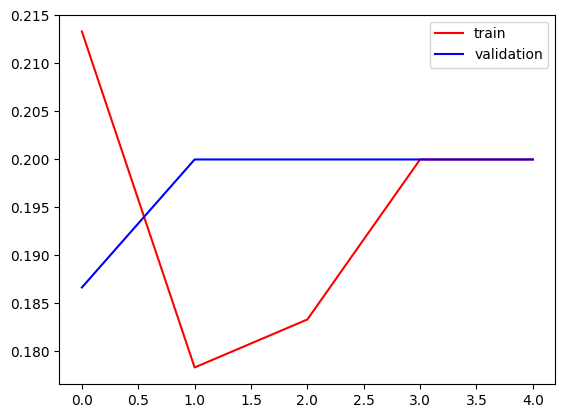

In [18]:
import matplotlib.pyplot as plt

plt.plot(r.history['accuracy'],color='red',label='train')
plt.plot(r.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

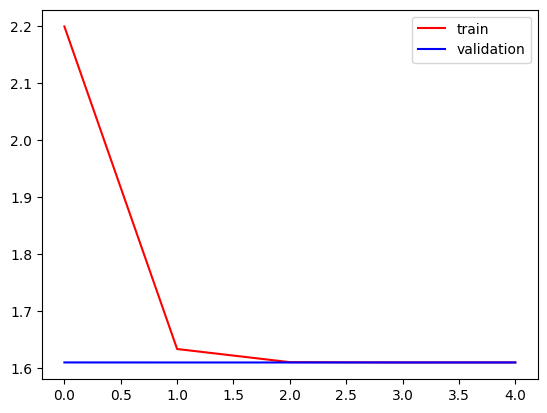

In [19]:
plt.plot(r.history['loss'],color='red',label='train')
plt.plot(r.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [20]:
# save model as a h5 file
model.save('model_vgg16.h5')

In [21]:
# Predicting the model

y_pred = model.predict(test_set)

10/10 [==============================] - 2s 148ms/step


In [22]:
# printing y_predicted values
y_pred

array([[0.20016524, 0.2004541 , 0.19876389, 0.20086123, 0.19975556],
       [0.20016524, 0.2004541 , 0.19876389, 0.20086123, 0.19975556],
       [0.20016524, 0.2004541 , 0.19876389, 0.20086123, 0.19975556],
       ...,
       [0.20016524, 0.2004541 , 0.19876389, 0.20086123, 0.19975556],
       [0.20016524, 0.2004541 , 0.19876389, 0.20086123, 0.19975556],
       [0.20016524, 0.2004541 , 0.19876389, 0.20086123, 0.19975556]],
      dtype=float32)

In [23]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [24]:
y_pred

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [25]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [26]:
# Load the model which as saved earlier

from tensorflow.keras.models import load_model
model=load_model('model_vgg16.h5')

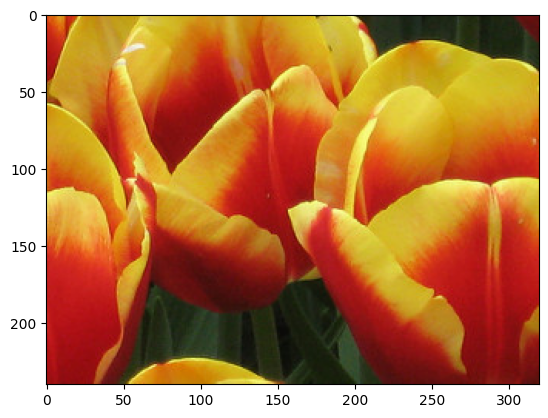

In [27]:
# Loading a test image and storing it in image
Z = plt.imread('tulip.jpg')
plt.imshow(Z)


In [28]:

# Loading a test image and storing it in image

img=image.load_img('tulip.jpg',target_size=(224,224))

x=image.img_to_array(img)
x.shape
x=x/255


In [29]:
from keras.applications.vgg16 import preprocess_input

In [30]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [31]:
# Predicting the image data and storing it in variable a

model.predict(img_data)
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 23ms/step


In [32]:
flower_name = ['dandelion',
 'sunflower',
 'tulip',
 'daisy',
 'rose']

In [33]:

flower_name[a[0]]

'daisy'